# 실습 1. 도함수 plot

In [54]:
import numpy as np
import matplotlib.pyplot as plt

DELTA_X = 1e-5

def derivative(f, a, h=DELTA_X):
    # 함수를 완성하시오
    return (f(a + h) - f(a - h)) / (2 * h)

def show_first_derivative(f, interval) :
    plt.figure(figsize=(12, 10), dpi=150) 
    x = np.linspace(*interval, 10000)
    y = f(x)
    
    # plot the origin function
    plt.subplot(3, 1, 1)
    plt.plot(x, y, label='Function', linewidth=2)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('origin Function')
    plt.axhline(0, color='gray', linestyle='dashed')
    plt.axvline(0, color='gray', linestyle='dashed')
    plt.legend()
    
    # plot the first derivative of function (plot code를 완성하시오)
    plt.subplot(3, 1, 2)
    y_prime = derivative(f, x)
    plt.plot(x, y_prime, label='First Derivative', linewidth=2, color = 'orange')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('First Derivative Function')
    plt.axhline(0, color='gray', linestyle='dashed')
    plt.axvline(0, color='gray', linestyle='dashed')
    plt.legend()
    
    # Show the plots
    plt.tight_layout()
    plt.show()

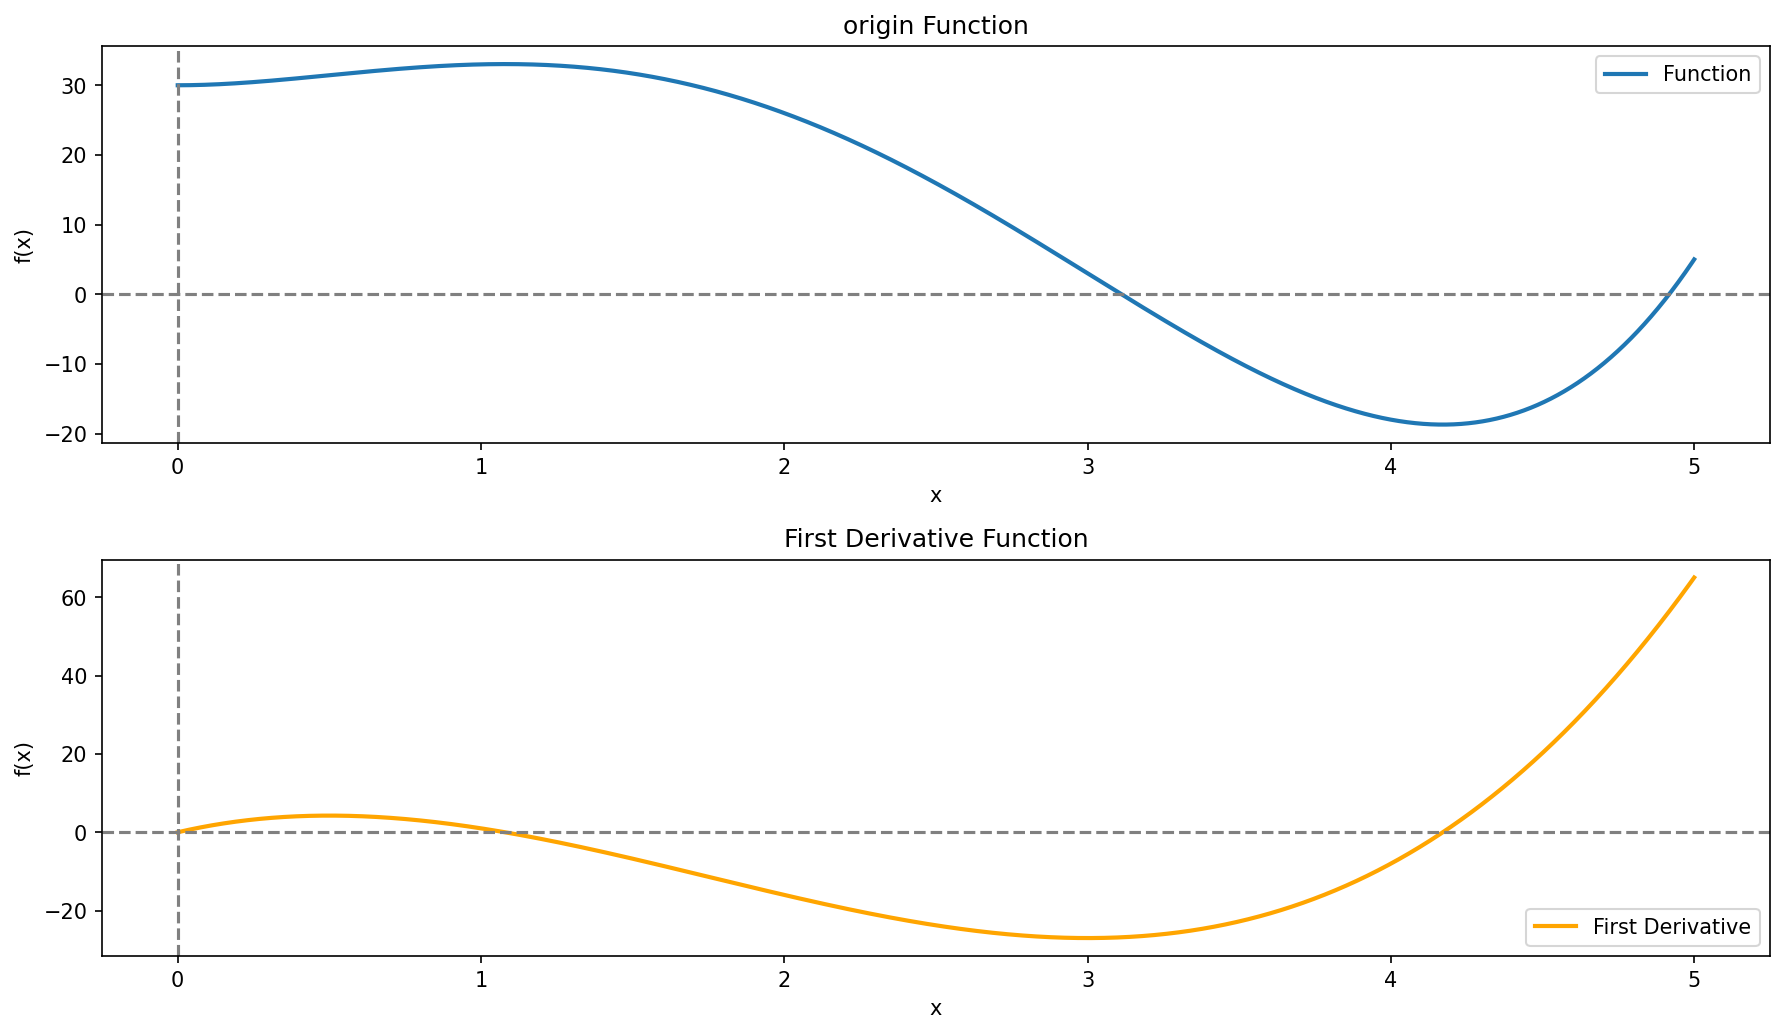

In [55]:
def func(x):
    return x**4 - 7*x**3 + 9*x**2 + 30

show_first_derivative(f=func, interval=(0, 5)) # 수정 x

# 실습 2. 접선 그리기

In [118]:
import numpy as np
import matplotlib.pyplot as plt


DELTA_X = 1e-5

def derivative(f, a, h=DELTA_X):
    # 실습 1에서 사용한 derivative 활용
    return (f(a + h) - f(a - h)) / (2 * h)

def show_derivate(f,x,interval, history_x=None, history_y=None):
    # 접선 방정식
    y_prime = derivative(f, x)
    tangent_line = lambda t: f(x) + y_prime * (t - x)
    
    x_tangent = np.linspace(interval[0], interval[1], 100)
    x_tangent_line = np.linspace(x - 4, x + 4, 100)
    y_tangent = tangent_line(x_tangent_line)
    
    # 주어진 구간에서 함수 f의 최대값과 최소값을 찾음
    x_values = np.linspace(interval[0], interval[1], 100)
    y_values = [f(val) for val in x_values]
    min_value = min(y_values)
    max_value = max(y_values)
    
    # Plot the function and the tangent line
    plt.figure(figsize=(8, 6))
    plt.plot(x_tangent, f(x_tangent), linewidth=2)
    plt.plot(x_tangent_line, y_tangent, linestyle='--', linewidth=2, color = 'green')
    plt.scatter(x, f(x), c='red', marker='o')
    
    plt.ylim(min_value-0.2, max_value+0.2)
    plt.title('Function and Tangent Line')
    plt.grid(True)

    plt.show()

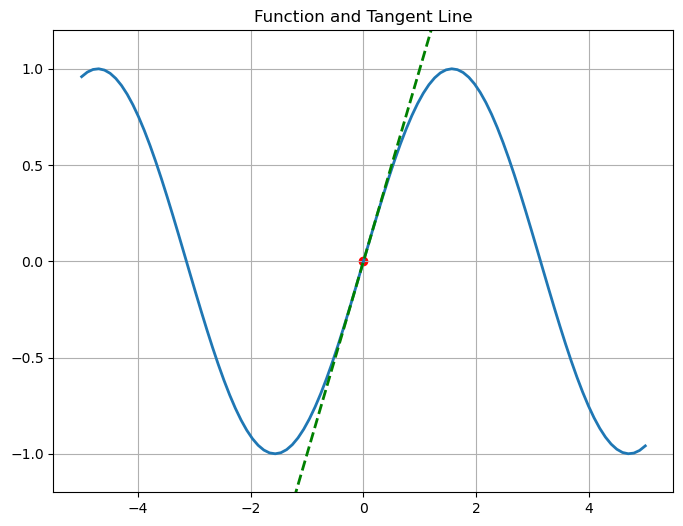

In [119]:
def func(x):
    return np.sin(x)
    # return x**4 - 7*x**3 + 9*x**2 + 30
    
show_derivate(f=func, x=0, interval=(-5,5)) # 수정 x

# 실습 3. optimization

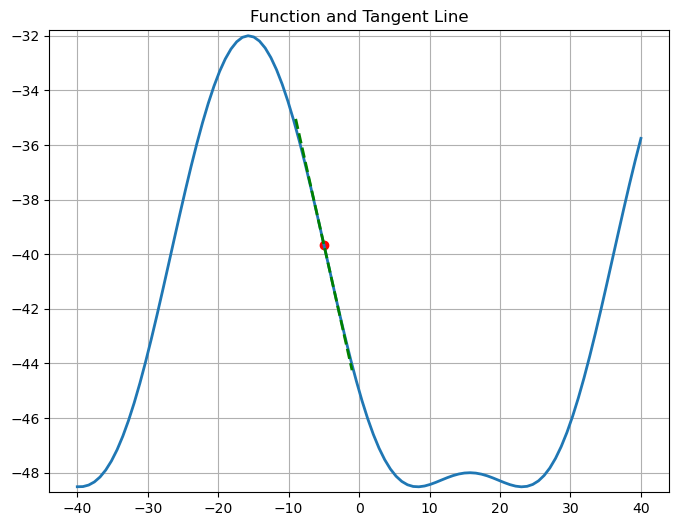

In [120]:
import numpy as np

def tire_performance(t):
    return (np.exp(np.log(np.sin(1/10 * t) + 3)) ** 3) - 4 * (np.exp(np.log(np.sin(1/10 * t) + 3)) ** 2) - 12 * (np.exp(np.log(np.sin(1/10 * t) + 3)) ** 1)

# 실습 2에서 구현한 show_derivate 함수를 사용 (수정 x)
show_derivate(tire_performance, -5, (-40, 40))

[best_x] :  -15.707900866751885
[best_performance] :  -32.000000000311516


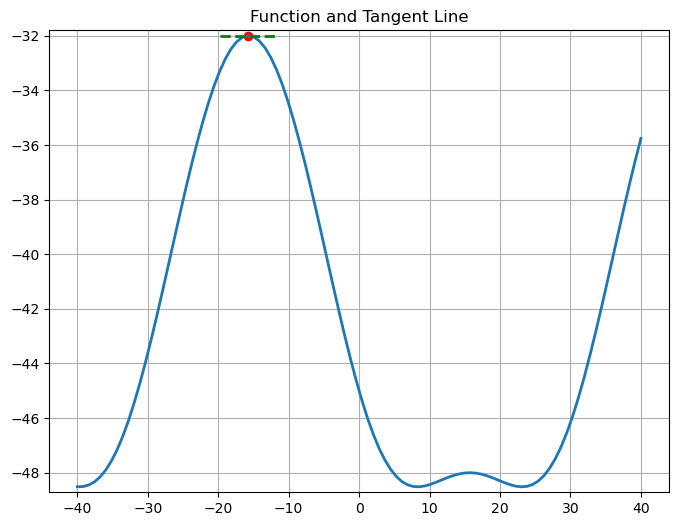

In [121]:
EPSILON=1e-7

def gradient_ascent(x_start):
    learning_rate = 0.01
    max_iterations = 10000
    
    x_current = x_start
    
    for i in range(max_iterations):
        gradient = derivative(tire_performance, x_current)
        
        # 다음 위치 계산
        x_next = x_current + learning_rate * gradient
        
        # 변화가 충분히 작을 경우 종료
        if abs(x_next - x_current) < EPSILON:
            break
        
        x_current = x_next
    
    return x_current

x_start = -5 # 수정 x

best_x = gradient_ascent(x_start)
print('[best_x] : ', best_x)
print('[best_performance] : ', tire_performance(best_x))

show_derivate(tire_performance, best_x, (-40, 40))

In [138]:
def show_derivate2(f,x,interval, values, history_x=None, history_y=None):
    # 접선 방정식
    y_prime = derivative(f, x)
    tangent_line = lambda t: f(x) + y_prime * (t - x)
    
    x_tangent = np.linspace(interval[0], interval[1], 100)
    x_tangent_line = np.linspace(x - 4, x + 4, 100)
    y_tangent = tangent_line(x_tangent_line)
    
    # 주어진 구간에서 함수 f의 최대값과 최소값을 찾음
    x_values = np.linspace(interval[0], interval[1], 10000)
    y_values = [f(val) for val in x_values]
    min_value = min(y_values)
    max_value = max(y_values)
    
    # Plot the function and the tangent line
    plt.figure(figsize=(8, 6))
    plt.plot(x_tangent, f(x_tangent), linewidth=2)
    plt.plot(x_tangent_line, y_tangent, linestyle='--', linewidth=2, color = 'green')
    plt.scatter(x, f(x), c='red', marker='o')
    
    for x in range(len(values)):
        if (x % 100) == 0:
            plt.scatter(values[x], f(values[x]), c='green', marker='o')
    
    plt.ylim(min_value-0.2, max_value+0.2)
    plt.title('Function and Tangent Line')
    plt.grid(True)

    plt.show()

[best_x] :  -15.707900866751885
[best_performance] :  -32.000000000311516


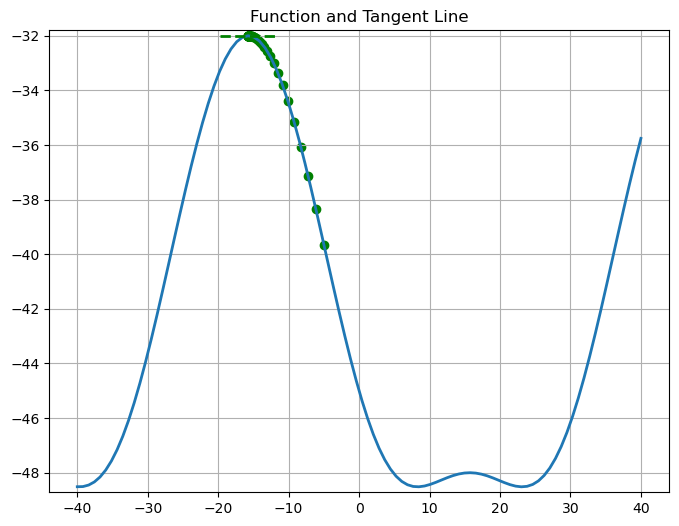

In [139]:
EPSILON=1e-7

def gradient_ascent(x_start):
    learning_rate = 0.01
    max_iterations = 10000
    
    x_current = x_start
    values = [x_start]
    
    for i in range(max_iterations):
        gradient = derivative(tire_performance, x_current)
        
        # 다음 위치 계산
        x_next = x_current + learning_rate * gradient
                           
        # 변화가 충분히 작을 경우 종료
        if abs(x_next - x_current) < EPSILON:
            break
        
        values.append(x_next)
        x_current = x_next
    
    return x_current, values

x_start = -5 # 수정 x

best_x, values = gradient_ascent(x_start)
print('[best_x] : ', best_x)
print('[best_performance] : ', tire_performance(best_x))

show_derivate2(tire_performance, best_x, (-40, 40), values)

## 고찰
타이어의 성능은 온도에 의해 결정되고 그 온도가 약 -15도 라는 것을 알게되었다. 그 결과를 얻기 위해 gradient ascent 함수를 만들어 시각화하여 확인하는 과정이 흥미로웠다.